### 1- Développement d’un Modèle de Prédiction avec l’Analyse de Fourier avec quelques constituants

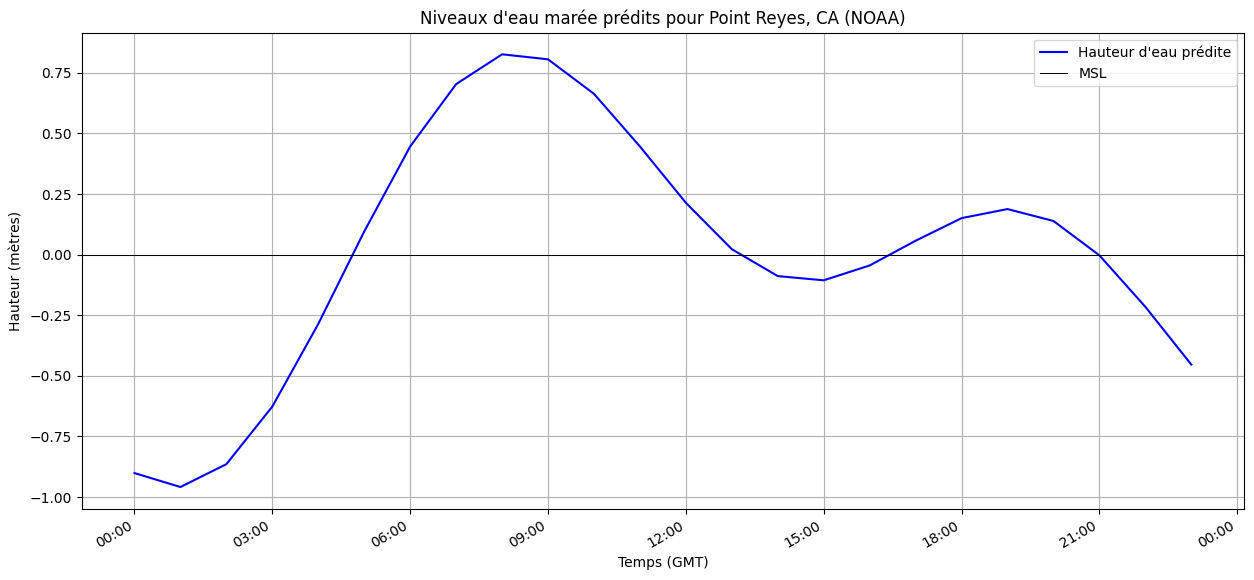

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
]

constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

epoch = datetime(1983, 1, 1) 

def tide_height(time, constituents):
    t_seconds = (time - epoch).total_seconds()
    height = 0.0
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

start_time = datetime(2024, 1, 1)
times = [start_time + timedelta(hours=i) for i in range(24)]
predicted_heights = [tide_height(t, constituents_converted) for t in times]

times_plt = mdates.date2num(times)

plt.figure(figsize=(15, 7))
plt.plot_date(times_plt, predicted_heights, '-', label='Hauteur d\'eau prédite', color='blue')
plt.axhline(0, color='black', linewidth=0.7, label='MSL') 

plt.title('Niveaux d\'eau marée prédits pour Point Reyes, CA (NOAA)') 
plt.ylabel('Hauteur (mètres)') 
plt.xlabel('Temps (GMT)')  
plt.legend() 
plt.grid(True)

plt.gcf().autofmt_xdate()  
date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.savefig('predicted_tides.pdf', bbox_inches='tight')

plt.show()


### 2- Développement d’un Modèle de Prédiction avec l’Analyse de Fourier avec les 37 constituants

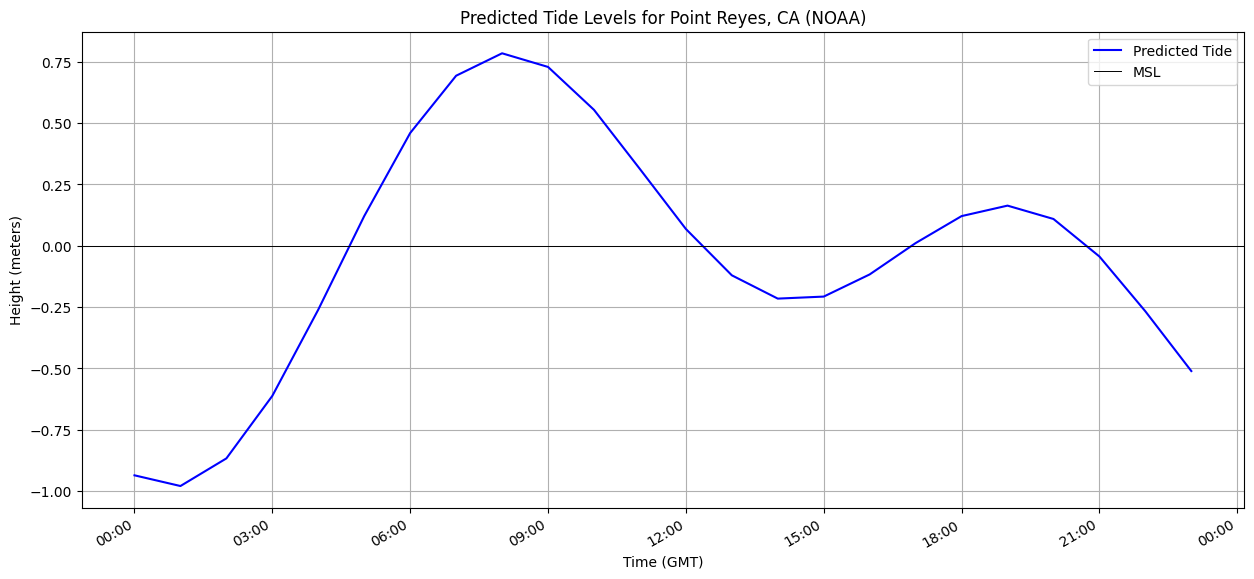

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]


constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

epoch = datetime(1983, 1, 1)  

def tide_height(time, constituents):
    t_seconds = (time - epoch).total_seconds()
    height = 0.0
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

start_time = datetime(2024, 1, 1)
times = [start_time + timedelta(hours=i) for i in range(24)]
predicted_heights = [tide_height(t, constituents_converted) for t in times]

times_plt = mdates.date2num(times)

plt.figure(figsize=(15, 7))
plt.plot_date(times_plt, predicted_heights, '-', label='Predicted Tide', color='blue')
plt.axhline(0, color='black', linewidth=0.7, label='MSL')  # Add Mean Sea Level line

plt.title('Predicted Tide Levels for Point Reyes, CA (NOAA)')
plt.ylabel('Height (meters)')
plt.xlabel('Time (GMT)')
plt.legend()
plt.grid(True)

plt.gcf().autofmt_xdate() 
date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()


### Affichage des données de NOAA

C:\Users\User\AppData\Local\Temp\ipykernel_9908\2467446100.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


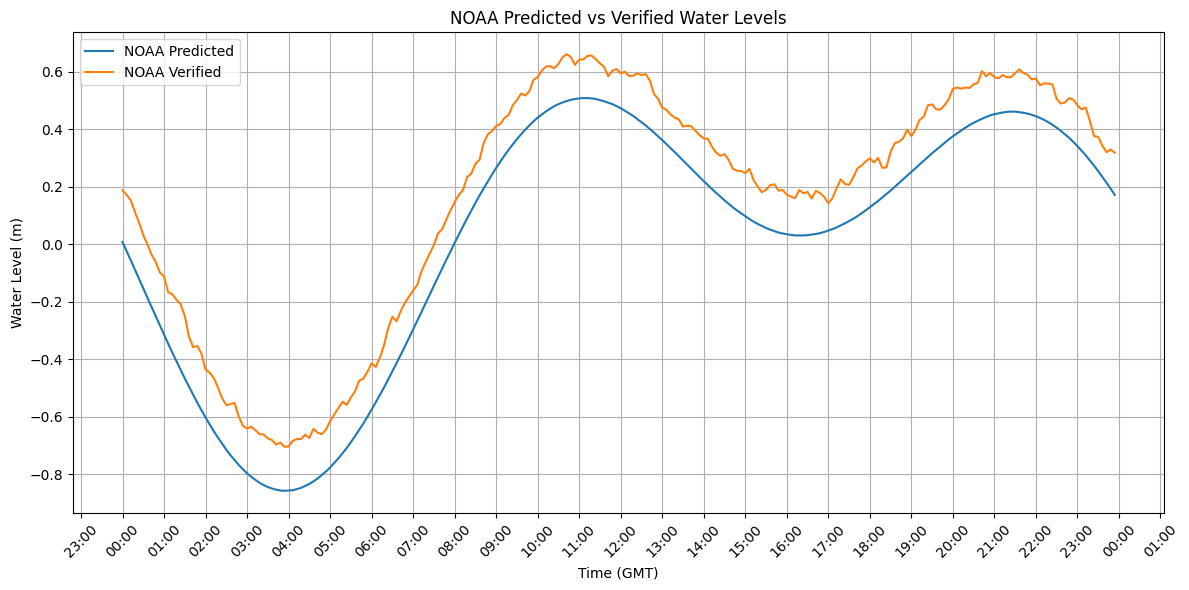

In [ ]:
### NOAA

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Chemin vers le fichier CSV de la NOAA
noaa_csv_path = 'CO-OPS_9415020_met.csv'

# Lire le fichier CSV en utilisant pandas
noaa_data = pd.read_csv(noaa_csv_path)

# Convertir les colonnes 'Date' et 'Time' en un seul objet datetime
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])

# Assurer que les données sont triées par datetime
noaa_data.sort_values('Datetime', inplace=True)

# Convertir les hauteurs d'eau en mètres si elles ne le sont pas déjà
# Ici, on suppose que les données sont déjà en mètres, donc pas de conversion nécessaire

# Filtrer les données pour la période souhaitée
start_date = '2024-01-01 00:00'
end_date = '2024-01-01 23:59'
mask = (noaa_data['Datetime'] >= start_date) & (noaa_data['Datetime'] <= end_date)
filtered_data = noaa_data.loc[mask]

# Tracer les données
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Datetime'], filtered_data['Predicted (m)'], label='NOAA Predicted')
plt.plot(filtered_data['Datetime'], filtered_data['Verified (m)'], label='NOAA Verified')

# Ajouter le graphique des prédictions de votre modèle ici

# Formater le graphique
plt.title('NOAA Predicted vs Verified Water Levels')
plt.xlabel('Time (GMT)')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Comparaison des niveaux d’eau marée prévus par notre modèle avec les données prévues et vérifiées par la NOAA

C:\Users\User\AppData\Local\Temp\ipykernel_18304\2084324524.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


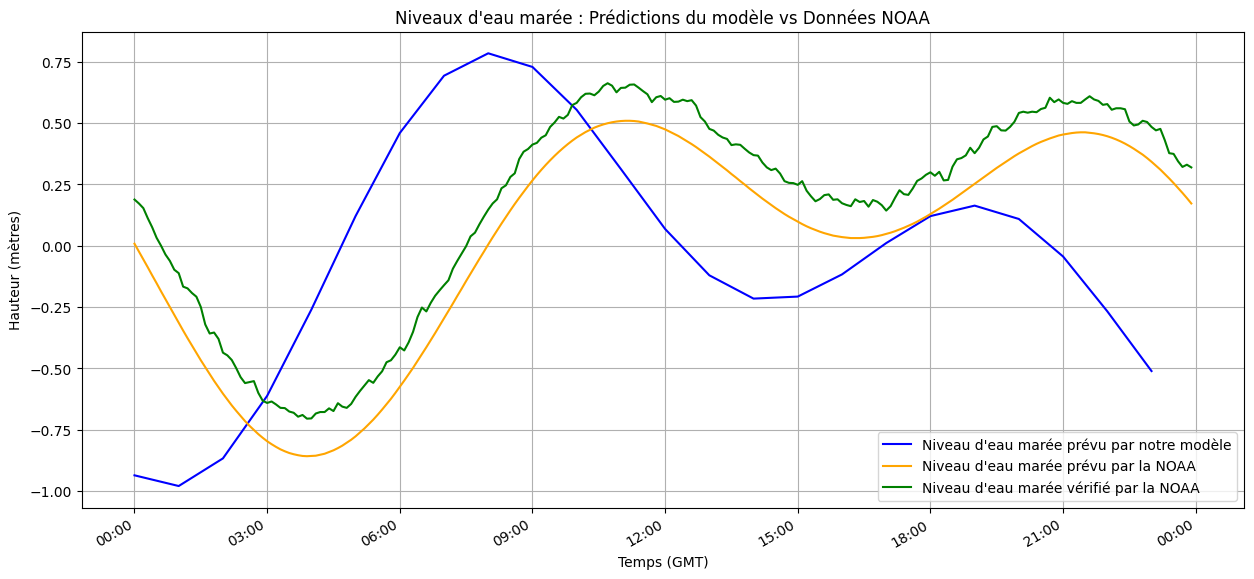

In [ ]:
### la prédiction avec NOAA ensemble

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

# Constants for conversion
feet_to_meters = 0.3048
degrees_to_radians = np.pi / 180

# Provided tidal constituents with conversion from feet to meters for amplitude,
# and degrees to radians for phases and speeds.
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Convert the constituents to use meters and radians
constituents_converted = [
    (name, amp * feet_to_meters, phase * degrees_to_radians, speed * degrees_to_radians / 3600) 
    for name, amp, phase, speed in constituents
]

# Time reference (epoch) for the constituents' phase
epoch = datetime(1983, 1, 1)  # Starting point for the tidal data epoch

# Function to calculate the tidal height at a given time
def tide_height(time, constituents):
    # Calculate the number of seconds from the epoch to the prediction time
    t_seconds = (time - epoch).total_seconds()
    # Initialize the height with the reference level (Z0), which is 0 for MSL
    height = 0.0
    # Add the contribution of each constituent
    for _, amplitude, phase, speed in constituents:
        height += amplitude * np.cos(speed * t_seconds + phase)
    return height

# Generate the predicted tide heights for a full day at one-hour intervals
start_time = datetime(2024, 1, 1)
times = [start_time + timedelta(hours=i) for i in range(24)]
predicted_heights = [tide_height(t, constituents_converted) for t in times]

# Convert times to matplotlib date format for plotting
times_plt = mdates.date2num(times)

# Read NOAA CSV data for predicted and verified water levels
noaa_csv_path = 'CO-OPS_9415020_met.csv'
noaa_data = pd.read_csv(noaa_csv_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_data.sort_values('Datetime', inplace=True)

# Filter the NOAA data for the same date range as the model predictions
filtered_noaa_data = noaa_data[(noaa_data['Datetime'] >= start_time) & (noaa_data['Datetime'] < start_time + timedelta(days=1))]

# Plot all the data
plt.figure(figsize=(15, 7))

# Plot the model's predicted tide levels
plt.plot_date(times_plt, predicted_heights, '-', label='Niveau d\'eau marée prévu par notre modèle', color='blue')

# Plot the NOAA predicted tide levels
plt.plot_date(mdates.date2num(filtered_noaa_data['Datetime']), filtered_noaa_data['Predicted (m)'], '-', label='Niveau d\'eau marée prévu par la NOAA', color='orange')

# Plot the NOAA verified tide levels
plt.plot_date(mdates.date2num(filtered_noaa_data['Datetime']), filtered_noaa_data['Verified (m)'], '-', label='Niveau d\'eau marée vérifié par la NOAA  ', color='green')

# Formatting the plot
plt.title('Niveaux d\'eau marée : Prédictions du modèle vs Données NOAA')
plt.xlabel('Temps (GMT)')
plt.ylabel('Hauteur (mètres)')
plt.legend()
plt.grid(True)

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.savefig('predicted_tides_NOAA.pdf', bbox_inches='tight')

plt.show()


### Optimisation des phases et amplitude avec SciPy

Optimization successful.
Optimization time: 0:00:00.469741
Optimized Constituents:
M2: Amplitude (meters) = -0.6847, Phase (degrees) = -0.4372
S2: Amplitude (meters) = -0.5629, Phase (degrees) = -1.0745
N2: Amplitude (meters) = -0.1234, Phase (degrees) = -0.2692
K1: Amplitude (meters) = -0.0318, Phase (degrees) = 0.2975
O1: Amplitude (meters) = -0.0078, Phase (degrees) = -0.0382
RMSE: 0.6178688914524555
Optimized amplitude 


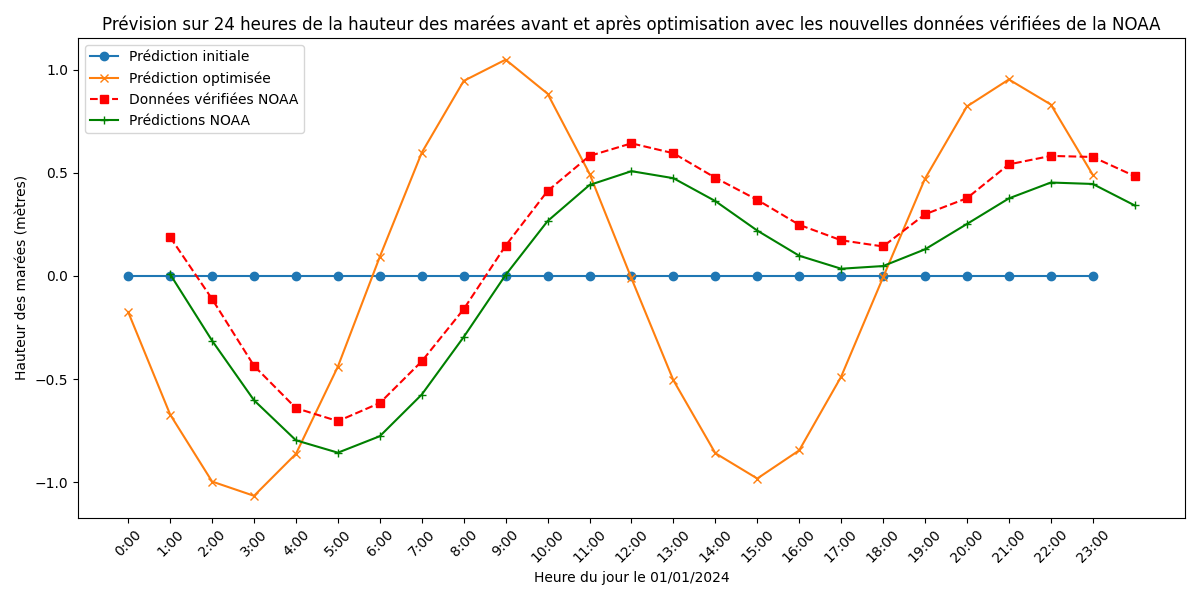

In [7]:
%matplotlib widget
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035)
]

csv_file_path = '2023Arcachon.csv'
tide_data = pd.read_csv(csv_file_path)

epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

initial_params = np.concatenate([amplitudes, phases])

start_time = datetime.now()

res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

end_time = datetime.now()

duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")

    print("Optimized Constituents:")
    for i, constituent in enumerate(constituents):
        name = constituent[0]
        print(f"{name}: Amplitude (meters) = {optimized_amplitudes[i]:.4f}, Phase (degrees) = {optimized_phases[i]:.4f}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

noaa_data_path = '01-01-2024.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda x: x.timestamp()).values
noaa_verified_heights = noaa_data['Verified (m)'].values
noaa_predicted_heights = noaa_data['Predicted (m)'].values

start_datetime = datetime(2024, 1, 1)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - epoch.timestamp())

predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE: {rmse}")

print('Optimized amplitude ' )

plt.figure(figsize=(12, 6))
plt.plot(timestamps, predicted_initial, label='Prédiction initiale', marker='o')
plt.plot(timestamps, predicted_optimized, label='Prédiction optimisée', marker='x')
plt.plot(noaa_timestamps, noaa_verified_heights, label='Données vérifiées NOAA', marker='s', linestyle='--', color='red')
plt.plot(noaa_timestamps, noaa_predicted_heights, label='Prédictions NOAA', marker='+', color='green')
plt.xlabel('Heure du jour le 01/01/2024')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prévision sur 24 heures de la hauteur des marées avant et après optimisation avec les nouvelles données vérifiées de la NOAA')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig('predicted_tides_p&a0.pdf', bbox_inches='tight')
plt.show()


RMSE: 0.12863272750336432


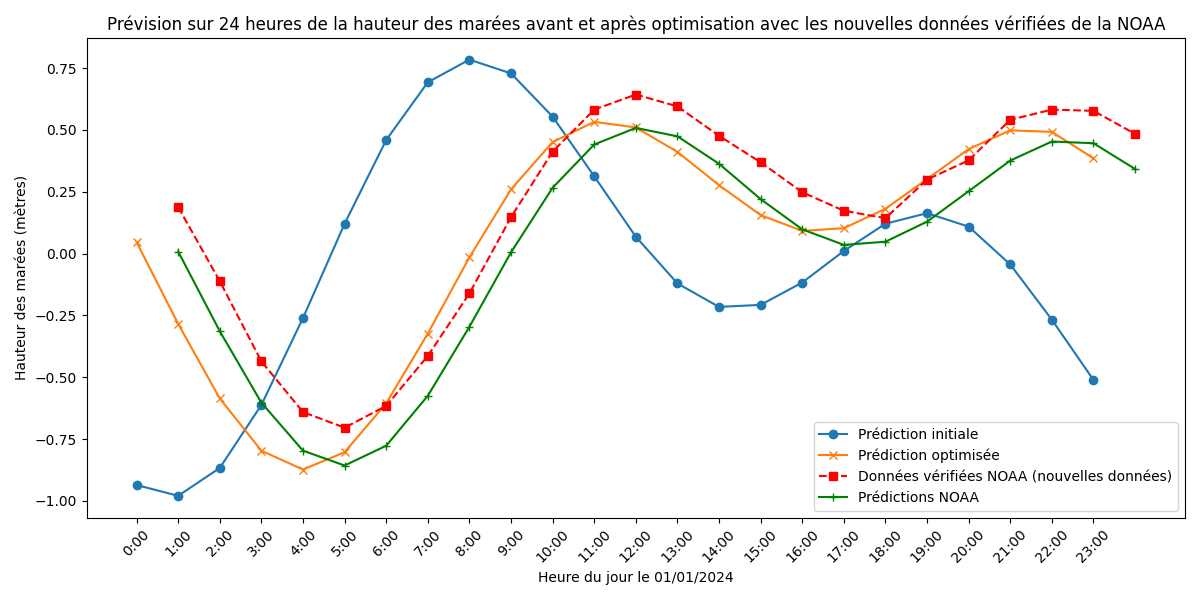

In [ ]:
# en français et pour le 1-1-2024

%matplotlib widget
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Définir les constituants
constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

# Charger les données des marées
csv_file_path = '0101-3112-2023(m).csv'
tide_data = pd.read_csv(csv_file_path)

# Combiner la date et l'heure en une seule colonne datetime
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extraire les hauteurs observées et les temps
observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

# Charger les nouvelles données NOAA
noaa_data_path = '01-01-2024.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda x: x.timestamp()).values
noaa_verified_heights = noaa_data['Verified (m)'].values
noaa_predicted_heights = noaa_data['Predicted (m)'].values  # Assumons que cette colonne existe

# Prédictions de marée pour ces horaires
start_datetime = datetime(2024, 1, 1)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - epoch.timestamp())

# Prédire les hauteurs de marée
predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

# Calculer RMSE
rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE: {rmse}")

# Affichage du graphique
plt.figure(figsize=(12, 6))
plt.plot(timestamps, predicted_initial, label='Prédiction initiale', marker='o')
plt.plot(timestamps, predicted_optimized, label='Prédiction optimisée', marker='x')
plt.plot(noaa_timestamps, noaa_verified_heights, label='Données vérifiées NOAA (nouvelles données)', marker='s', linestyle='--', color='red')
plt.plot(noaa_timestamps, noaa_predicted_heights, label='Prédictions NOAA', marker='+', color='green')
plt.xlabel('Heure du jour le 01/01/2024')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prévision sur 24 heures de la hauteur des marées avant et après optimisation avec les nouvelles données vérifiées de la NOAA')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)
plt.legend()
plt.tight_layout()  # Ajuster la mise en page pour éviter le rognage des étiquettes
plt.show()


Optimization successful.
Optimization time: 0:00:01.088715
Optimized Constituents:
M2: Amplitude (meters) = 0.5300, Phase (degrees) = 2.2628
S2: Amplitude (meters) = -0.1391, Phase (degrees) = -0.2943
N2: Amplitude (meters) = 0.1192, Phase (degrees) = 2.6025
K1: Amplitude (meters) = 0.4171, Phase (degrees) = 2.5487
O1: Amplitude (meters) = 0.2693, Phase (degrees) = 1.9492
P1: Amplitude (meters) = 0.1192, Phase (degrees) = 2.3408
M4: Amplitude (meters) = -0.0006, Phase (degrees) = 4.5218
RMSE: 0.05833583428897624
Optimized amplitude

Optimization successful.
Optimization time: 0:09:13.452179
Optimized Constituents:
M2: Amplitude (meters) = 0.5312, Phase (degrees) = 2.2626
S2: Amplitude (meters) = -0.1386, Phase (degrees) = -0.2912
N2: Amplitude (meters) = 0.1198, Phase (degrees) = 2.5816
K1: Amplitude (meters) = 0.4175, Phase (degrees) = 2.5486
O1: Amplitude (meters) = 0.2702, Phase (degrees) = 1.9528
P1: Amplitude (meters) = 0.1195, Phase (degrees) = 2.3417
M4: Amplitude (meters) = -0.0007, Phase (degrees) = 4.4661
M6: Amplitude (meters) = 0.0003, Phase (degrees) = 1.6157
MK3: Amplitude (meters) = -0.0000, Phase (degrees) = 3.4991
S4: Amplitude (meters) = 0.0005, Phase (degrees) = 0.0235
MN4: Amplitude (meters) = -0.0004, Phase (degrees) = 4.1282
NU2: Amplitude (meters) = 0.0236, Phase (degrees) = 2.0909
S6: Amplitude (meters) = -0.0007, Phase (degrees) = 1.1671
MU2: Amplitude (meters) = 0.0134, Phase (degrees) = 2.7083
2N2: Amplitude (meters) = 0.0146, Phase (degrees) = 2.9210
OO1: Amplitude (meters) = -0.0218, Phase (degrees) = 2.9642
LAM2: Amplitude (meters) = 0.0016, Phase (degrees) = 4.1387
S1: Amplitude (meters) = -0.0126, Phase (degrees) = 6.6094
M1: Amplitude (meters) = 0.0231, Phase (degrees) = 2.9310
J1: Amplitude (meters) = -0.0252, Phase (degrees) = 5.5690
MM: Amplitude (meters) = -0.0082, Phase (degrees) = -0.4088
SSA: Amplitude (meters) = -0.0376, Phase (degrees) = 3.3205
...
M8: Amplitude (meters) = -0.0003, Phase (degrees) = 0.0121
MS4: Amplitude (meters) = 0.0001, Phase (degrees) = 3.3887
RMSE: 0.04937862912559999
Optimized amplitude 

## 6- Vers Une Précision Renforcée avec une comparaison par rapport à NOAA

Dans la continuité de notre démarche d'optimisation des prédictions de marées, nous avons mis en œuvre une procédure d'affinement plus poussée. Grâce à l'utilisation des capacités avancées de SciPy, nous avons affiné les paramètres de notre modèle — les amplitudes et les phases — à l'aide de l'optimisation par la méthode des moindres carrés. Cet ajustement délicat visait à réduire l'erreur entre les hauteurs observées par la NOAA et celles prédites par notre modèle.

Les résultats de cette étape d'optimisation, manifestement réussie, se traduisent par une série d'amplitudes et de phases optimisées. Comme le démontre le graphique, cette amélioration méthodologique permet à notre prédiction optimisée (représentée par la courbe orange) de s'aligner plus étroitement avec les données vérifiées de la NOAA (en rouge), par rapport à notre prédiction initiale (en bleu).

Le processus a culminé dans une comparaison visuelle qui illustre non seulement une réduction du RMSE mais également une confirmation de l'efficacité de nos ajustements par rapport à des données vérifiées actualisées. Cette progression souligne l'alignement accru entre notre modèle informatique et les phénomènes maritimes réels, soulignant l'importance de l'optimisation dans la prédiction des marées.

Optimization successful.
Optimization time: 0:00:01.195972
Optimized Constituents:
M2: Amplitude (meters) = 0.5300, Phase (degrees) = 2.2628
S2: Amplitude (meters) = -0.1391, Phase (degrees) = -0.2943
N2: Amplitude (meters) = 0.1192, Phase (degrees) = 2.6025
K1: Amplitude (meters) = 0.4171, Phase (degrees) = 2.5487
O1: Amplitude (meters) = 0.2693, Phase (degrees) = 1.9492
P1: Amplitude (meters) = 0.1192, Phase (degrees) = 2.3408
M4: Amplitude (meters) = -0.0006, Phase (degrees) = 4.5218

In [106]:
### JAX OPTAX

import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import optax
import numpy as np

# Constituents definition remains the same
constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035)
]

# Load the tide data from CSV - Keep the path to your tide data CSV file
csv_file_path = 'donnees_marees_2020_2023.csv'
tide_data = pd.read_csv(csv_file_path)

# Combine date and time into one datetime column (if necessary) and convert to seconds since epoch
epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

# Extract observed heights and times
observed_heights = jnp.array(tide_data['Verified (m)'].values)
times = jnp.array(tide_data['Seconds since epoch'].values)

# Convert amplitudes and phases
amplitudes = jnp.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = jnp.array([phase for _, _, phase, _ in constituents]) * jnp.pi / 180
speeds = jnp.array([speed for _, _, _, speed in constituents]) * jnp.pi / 180 / 3600

# Prediction function using JAX
def predict_tide(times, amplitudes, phases, speeds):
    tide_height = jnp.sum(amplitudes * jnp.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

# Loss function using JAX
def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return jnp.mean((predictions - observed_heights) ** 2)

# Gradient of the loss function
grad_loss_fn = jax.grad(loss_fn)

# Initialize the optimizer with Optax
optimizer = optax.adam(learning_rate=0.01)
initial_params = jnp.concatenate([amplitudes, phases])
opt_state = optimizer.init(initial_params)

# Optimization loop
for iteration in range(1000):  # You may want to adjust the number of iterations
    grads = grad_loss_fn(initial_params, times, observed_heights)
    updates, opt_state = optimizer.update(grads, opt_state)
    initial_params = optax.apply_updates(initial_params, updates)

# Extract optimized amplitudes and phases
optimized_amplitudes = initial_params[:len(speeds)]
optimized_phases = initial_params[len(speeds):]

# Calculer RMSE
rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE: {rmse}")

# For the plotting and predictions with the new NOAA data, make sure you convert
# the data into JAX arrays if they are not already in that format. 

# Assume you have NOAA data loaded similarly to the initial data and converted to JAX arrays where necessary.
# Replace the plotting section with the appropriate JAX array conversions.

# Example Plotting (Ensure your data is correctly formatted for plotting)
# This part is just an example and may need adjustments based on your actual NOAA data loading code
plt.figure(figsize=(12, 6))
plt.plot(timestamps, predicted_initial, label='Prédiction initiale', marker='o')
plt.plot(timestamps, predicted_optimized, label='Prédiction optimisée', marker='x')
# Ensure noaa_timestamps and noaa_verified_heights are converted to appropriate formats for plotting
plt.plot(noaa_timestamps, noaa_verified_heights, label='Données vérifiées NOAA', marker='s', linestyle='--', color='red')
plt.plot(noaa_timestamps, noaa_predicted_heights, label='Prédictions NOAA', marker='+', color='green')
plt.xlabel('Heure du jour le 01/01/2024')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prévision sur 24 heures de la hauteur des marées avant et après optimisation avec les données vérifiées de la NOAA')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)
plt.legend()
plt.tight_layout() # Adjust layout to prevent clipping of tick labels

plt.savefig('predicted_tides_JaxOptax.pdf', bbox_inches='tight')
plt.show()


TypeError: Value '['3.39' '3.48' '3.26' ... '3.57' '3.13' '2.57']' with dtype object is not a valid JAX array type. Only arrays of numeric types are supported by JAX.

### Calcul Algorithmique pour Identifier les Marées Hautes et Basses

Optimization successful.
Optimization time: 0:00:00.843903
Optimized Constituents:
M2: Amplitude (meters) = -0.5300, Phase (degrees) = -0.8788
S2: Amplitude (meters) = -0.1391, Phase (degrees) = -0.2945
N2: Amplitude (meters) = -0.1191, Phase (degrees) = -0.5394
K1: Amplitude (meters) = -0.4171, Phase (degrees) = -0.5929
O1: Amplitude (meters) = -0.2693, Phase (degrees) = -1.1921
P1: Amplitude (meters) = -0.1192, Phase (degrees) = -0.8008
M4: Amplitude (meters) = 0.0009, Phase (degrees) = 0.0178
RMSE: 0.19914868886742448

High Tides in the next 24 hours:
2024-01-01 11:00:00: Height 0.40 meters
2024-01-01 21:00:00: Height 0.40 meters

Low Tides in the next 24 hours:
2024-01-01 04:00:00: Height -0.89 meters
2024-01-01 16:00:00: Height 0.10 meters
Optimized amplitude 


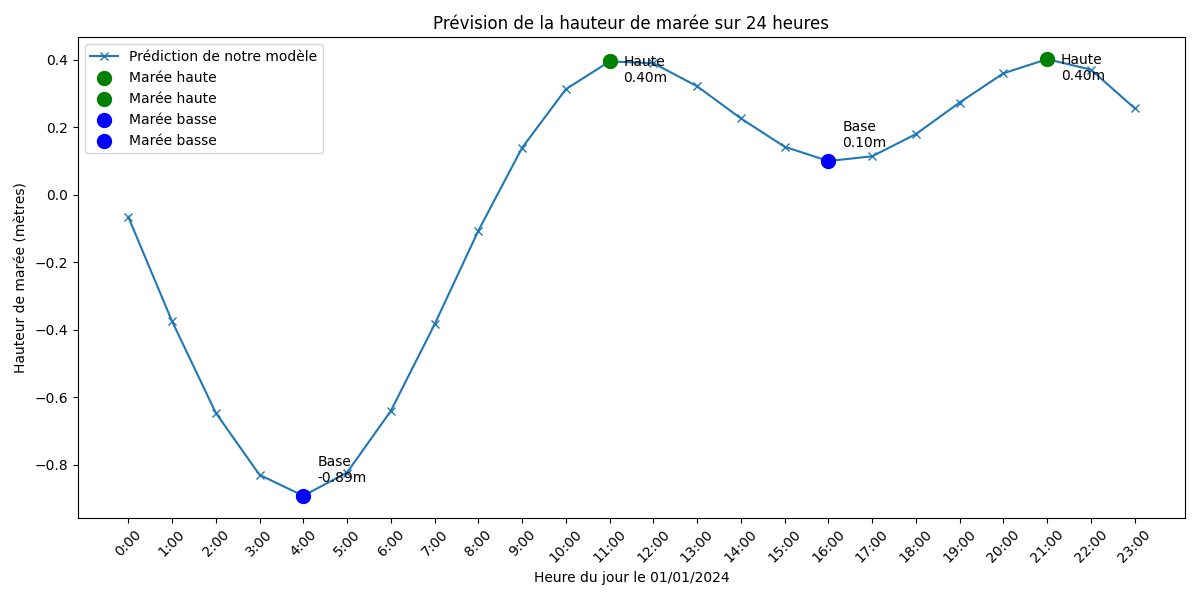

In [10]:
%matplotlib widget
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

constituents = [
    ('M2', 1, 1, 28.984104),
    ('S2', 1, 1, 30.0),
    ('N2', 1, 1, 28.43973),
    ('K1', 1, 1, 15.041069),
    ('O1', 1, 1, 13.943035),
    ('P1', 1, 1, 14.958931),
    ('M4', 1, 1, 57.96821)
]

csv_file_path = '0101-3112-2023(m).csv'
tide_data = pd.read_csv(csv_file_path)

epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

def loss_fn(params, times, observed_heights):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

initial_params = np.concatenate([amplitudes, phases])

start_time = datetime.now()

res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

end_time = datetime.now()

duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")

    print("Optimized Constituents:")
    for i, constituent in enumerate(constituents):
        name = constituent[0]
        print(f"{name}: Amplitude (meters) = {optimized_amplitudes[i]:.4f}, Phase (degrees) = {optimized_phases[i]:.4f}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

noaa_data_path = '01-01-2024.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda x: x.timestamp()).values
noaa_verified_heights = noaa_data['Verified (m)'].values

start_datetime = datetime(2024, 1, 1)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - epoch.timestamp())

# Predict tide heights for these times using initial and optimized parameters
predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

# Erreur quadratique
def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE: {rmse}")

# MAX and MIN
def find_high_low_tides(times, predicted_heights):
    high_tides = []
    low_tides = []
    for i in range(1, len(predicted_heights) - 1):
        if predicted_heights[i] > predicted_heights[i - 1] and predicted_heights[i] > predicted_heights[i + 1]:
            high_tides.append((times[i], predicted_heights[i]))
        elif predicted_heights[i] < predicted_heights[i - 1] and predicted_heights[i] < predicted_heights[i + 1]:
            low_tides.append((times[i], predicted_heights[i]))
    return high_tides, low_tides

high_tides, low_tides = find_high_low_tides(timestamps, predicted_optimized)

print("\nHigh Tides in the next 24 hours:")
for tide in high_tides:
    print(f"{datetime.fromtimestamp(tide[0]).strftime('%Y-%m-%d %H:%M:%S')}: Height {tide[1]:.2f} meters")

print("\nLow Tides in the next 24 hours:")
for tide in low_tides:
    print(f"{datetime.fromtimestamp(tide[0]).strftime('%Y-%m-%d %H:%M:%S')}: Height {tide[1]:.2f} meters")

print('Optimized amplitude ' )

plt.figure(figsize=(12, 6))
plt.plot(timestamps, predicted_optimized, label='Prédiction de notre modèle', marker='x')
plt.xlabel('Heure du jour le 01/01/2024')
plt.ylabel('Hauteur de marée (mètres)')
plt.title('Prévision de la hauteur de marée sur 24 heures')
plt.xticks(timestamps, [f"{i}:00" for i in range(24)], rotation=45)

for high_tide in high_tides:
    plt.scatter(high_tide[0], high_tide[1], color='green', s=100, label='Marée haute', zorder=5)
    plt.annotate('Haute\n{:.2f}m'.format(high_tide[1]), xy=(high_tide[0], high_tide[1]), xytext=(10,-15), textcoords='offset points')

for low_tide in low_tides:
    plt.scatter(low_tide[0], low_tide[1], color='blue', s=100, label='Marée basse', zorder=5)
    plt.annotate('Base\n{:.2f}m'.format(low_tide[1]), xy=(low_tide[0], low_tide[1]), xytext=(10,10), textcoords='offset points')


plt.legend()
plt.tight_layout() 
plt.show()

### Optimisation des phases et amplitudes avec Jax et Optax

RMSE: 0.6759175062179565


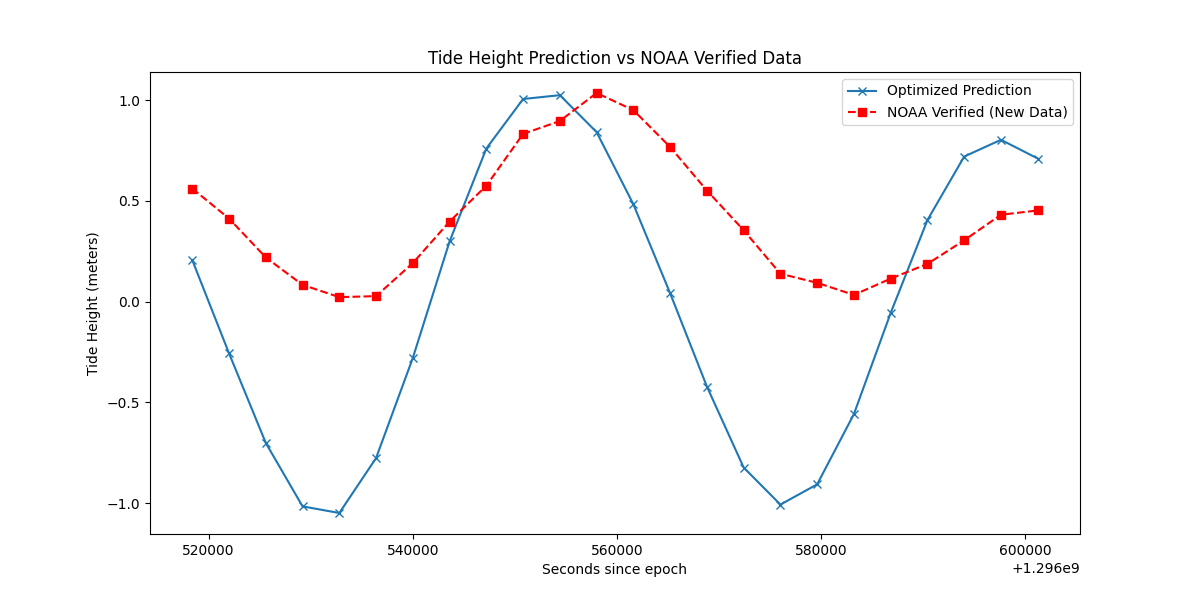

In [11]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import grad, jit
import optax
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035),
    ('P1', 0, 0, 14.958931),
    ('M4', 0, 0, 57.96821)
]

csv_file_path = 'donnees_marees_2020_2023_cleaned.csv'  
tide_data = pd.read_csv(csv_file_path)

epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

amplitudes = jnp.ones(len(constituents))
phases = jnp.ones(len(constituents)) * jnp.pi / 180  
speeds = jnp.array([speed for _, _, _, speed in constituents]) * jnp.pi / 180 / 3600

def predict_tide(times, amplitudes, phases, speeds):
    tide_height = jnp.sum(amplitudes * jnp.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

predict_tide_jit = jit(predict_tide)

def loss_fn(params, times, observed_heights):
    num_constituents = len(constituents)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return jnp.mean((predictions - observed_heights) ** 2)

times_jax = jax.device_put(times)
observed_heights_jax = jax.device_put(observed_heights)

initial_params = jnp.concatenate([amplitudes, phases])

optimizer = optax.adam(learning_rate=1e-2)
opt_state = optimizer.init(initial_params)

grad_fn = jit(grad(loss_fn))

@jit
def update(params, opt_state, times, observed_heights):
    grads = grad_fn(params, times, observed_heights)
    updates, opt_state = optimizer.update(grads, opt_state)
    return optax.apply_updates(params, updates), opt_state

for _ in range(5000):  
    initial_params, opt_state = update(initial_params, opt_state, times_jax, observed_heights_jax)

optimized_amplitudes = initial_params[:len(constituents)]
optimized_phases = initial_params[len(constituents):]

noaa_data_path = '01-02-2024.csv'  
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda dt: (dt - epoch).total_seconds()).values
noaa_verified_heights = noaa_data['Verified (m)'].values

predicted_optimized = predict_tide_jit(jax.device_put(noaa_timestamps), optimized_amplitudes, optimized_phases, speeds)

def calculate_rmse(observed, predicted):
    return jnp.sqrt(jnp.mean((observed - predicted) ** 2))

rmse = calculate_rmse(jax.device_put(noaa_verified_heights), predicted_optimized)
print(f"RMSE: {rmse}")

predicted_optimized_np = np.array(predicted_optimized)
noaa_timestamps_np = np.array(noaa_timestamps)
noaa_verified_heights_np = np.array(noaa_verified_heights)

plt.figure(figsize=(12, 6))
plt.plot(noaa_timestamps_np, predicted_optimized_np, label='Optimized Prediction', marker='x')
plt.plot(noaa_timestamps_np, noaa_verified_heights_np, label='NOAA Verified (New Data)', marker='s', linestyle='--', color='red')
plt.xlabel('Seconds since epoch')
plt.ylabel('Tide Height (meters)')
plt.title('Tide Height Prediction vs NOAA Verified Data')
plt.legend()
plt.show()



### Réduction du nombre de constituants

Optimisation réussie.
RMSE for optimized predictions: 0.04937862912559999
RMSE with 1 constituents: 0.6008676192923453
RMSE with 2 constituents: 0.450645085056698
RMSE with 3 constituents: 0.25045526856309297
RMSE with 4 constituents: 0.029374618451802444
RMSE with 5 constituents: 0.011058272284636341
RMSE with 6 constituents: 0.011046070702542881
RMSE with 7 constituents: 0.010210574306134637
RMSE with 8 constituents: 0.008685568112140362
RMSE with 9 constituents: 0.008964447890691214
RMSE with 10 constituents: 0.008690806838106866
RMSE with 11 constituents: 0.008688011075268886
RMSE with 12 constituents: 0.008622616164920957
RMSE with 13 constituents: 0.008619866204852625
RMSE with 14 constituents: 0.008683508740809377
RMSE with 15 constituents: 0.008772607338616682
RMSE with 16 constituents: 0.00879937388079236
RMSE with 17 constituents: 0.008822267055537234
RMSE with 18 constituents: 0.008597644391691245
RMSE with 19 constituents: 0.008767065064253645
RMSE with 20 constituents: 0.0

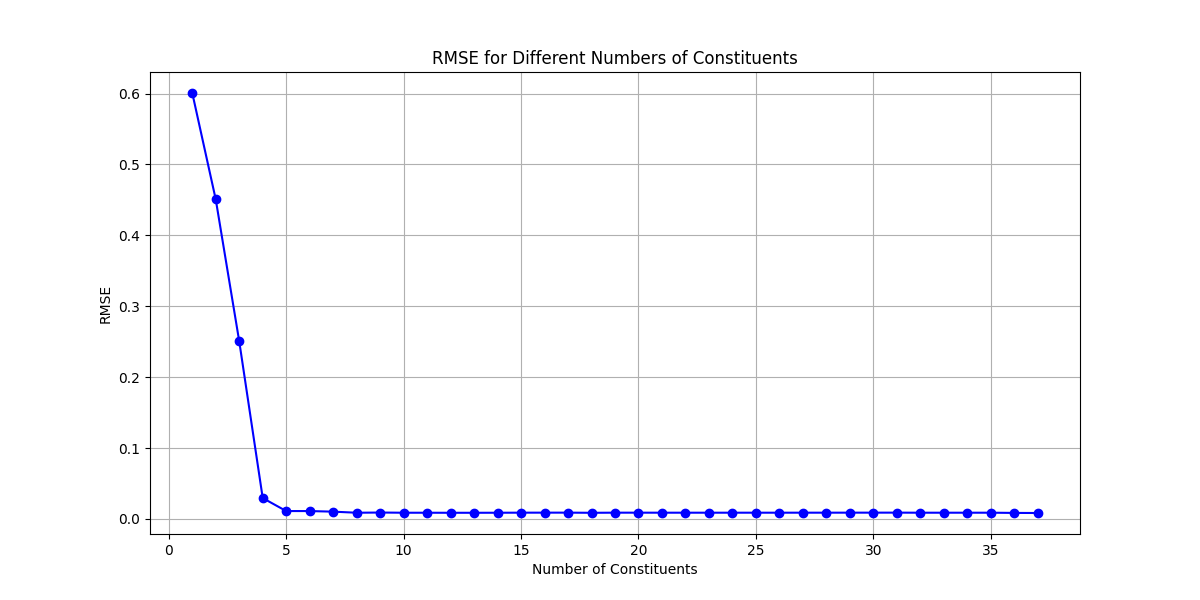

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

constituents = [
    ('M2', 1.8, 190.4, 28.984104),
    ('S2', 0.45, 196.3, 30.0),
    ('N2', 0.4, 164.1, 28.43973),
    ('K1', 1.26, 219.9, 15.041069),
    ('O1', 0.77, 204.1, 13.943035),
    ('P1', 0.39, 215.0, 14.958931),
    ('M4', 0.0, 259.1, 57.96821),
    ('M6', 0.0, 92.5, 86.95232),
    ('MK3', 0.0, 200.4, 44.025173),
    ('S4', 0.0, 0.8, 60.0),
    ('MN4', 0.0, 236.7, 57.423832),
    ('NU2', 0.08, 170.0, 28.512583),
    ('S6', 0.0, 66.8, 90.0),
    ('MU2', 0.04, 124.5, 27.968208),
    ('2N2', 0.05, 135.3, 27.895355),
    ('OO1', 0.04, 249.8, 16.139101),
    ('LAM2', 0.01, 221.1, 29.455626),
    ('S1', 0.05, 316.3, 15.0),
    ('M1', 0.04, 227.2, 14.496694),
    ('J1', 0.08, 233.8, 15.5854435),
    ('MM', 0.0, 0.0, 0.5443747),
    ('SSA', 0.11, 263.3, 0.0821373),
    ('SA', 0.19, 213.3, 0.0410686),
    ('MSF', 0.0, 0.0, 1.0158958),
    ('MF', 0.0, 0.0, 1.0980331),
    ('RHO', 0.03, 198.4, 13.471515),
    ('Q1', 0.14, 196.7, 13.398661),
    ('T2', 0.02, 189.4, 29.958933),
    ('R2', 0.0, 287.8, 30.041067),
    ('2Q1', 0.02, 197.9, 12.854286),
    ('2SM2', 0.0, 347.7, 31.015896),
    ('M3', 0.01, 10.8, 43.47616),
    ('L2', 0.03, 219.7, 29.528479),
    ('2MK3', 0.0, 165.5, 42.92714),
    ('K2', 0.12, 187.0, 30.082138),
    ('M8', 0.0, 0.0, 115.93642),
    ('MS4', 0.0, 194.3, 58.984104)
]

csv_file_path = '0101-3112-2023(m).csv'
tide_data = pd.read_csv(csv_file_path)

epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

initial_params = np.concatenate([amplitudes, phases])

res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights, speeds),  
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimisation réussie.")
else:
    print("Échec de l'optimisation.")

noaa_data_path = '10-01-2023.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_timestamps = noaa_data['Datetime'].apply(lambda x: x.timestamp()).values
noaa_verified_heights = noaa_data['Verified (m)'].values

start_datetime = datetime(2024, 1, 10)
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(24)])
times_since_epoch = (timestamps - epoch.timestamp())

predicted_initial = predict_tide(times_since_epoch, amplitudes, phases, speeds)
predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

rmse_optimized = calculate_rmse(noaa_verified_heights, predicted_optimized)
print(f"RMSE for optimized predictions: {rmse_optimized}")

def test_constituents_combinations(constituents, observed_heights, times):
    rmse_results = []
    for num_constituents in range(1, len(constituents) + 1):
        selected_constituents = constituents[:num_constituents]
        amplitudes = np.array([amp for _, amp, _, _ in selected_constituents]) * 0.3048
        phases = np.array([phase for _, _, phase, _ in selected_constituents]) * np.pi / 180
        speeds = np.array([speed for _, _, _, speed in selected_constituents]) * np.pi / 180 / 3600
        initial_params = np.concatenate([amplitudes, phases])

        res = minimize(
            fun=loss_fn,
            x0=initial_params,
            args=(times_since_epoch, observed_heights, speeds),
            method='L-BFGS-B',
            options={'maxfun': 50000, 'maxiter': 50000}
        )
        
        if res.success:
            optimized_params = res.x
            optimized_amplitudes = optimized_params[:num_constituents]
            optimized_phases = optimized_params[num_constituents:]
            predicted_optimized = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)
            rmse = calculate_rmse(noaa_verified_heights, predicted_optimized)
            rmse_results.append(rmse)
            print(f"RMSE with {num_constituents} constituents: {rmse}")
        else:
            rmse_results.append(float('inf'))
            print(f"Optimization failed for {num_constituents} constituents.")

    return rmse_results

rmse_results = test_constituents_combinations(constituents, noaa_verified_heights, times_since_epoch)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(constituents) + 1), rmse_results, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Constituents')
plt.ylabel('RMSE')
plt.title('RMSE for Different Numbers of Constituents')
plt.grid(True)

plt.savefig('nbrConstituants.pdf', bbox_inches='tight')
plt.show()


### Tests et Validation du Modèle pour février 2024

Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : 2.480077643297556 mètres
Optimization successful.
Optimization time: 0:00:02.030452
RMSE for the entire month: 0.30993208234774977


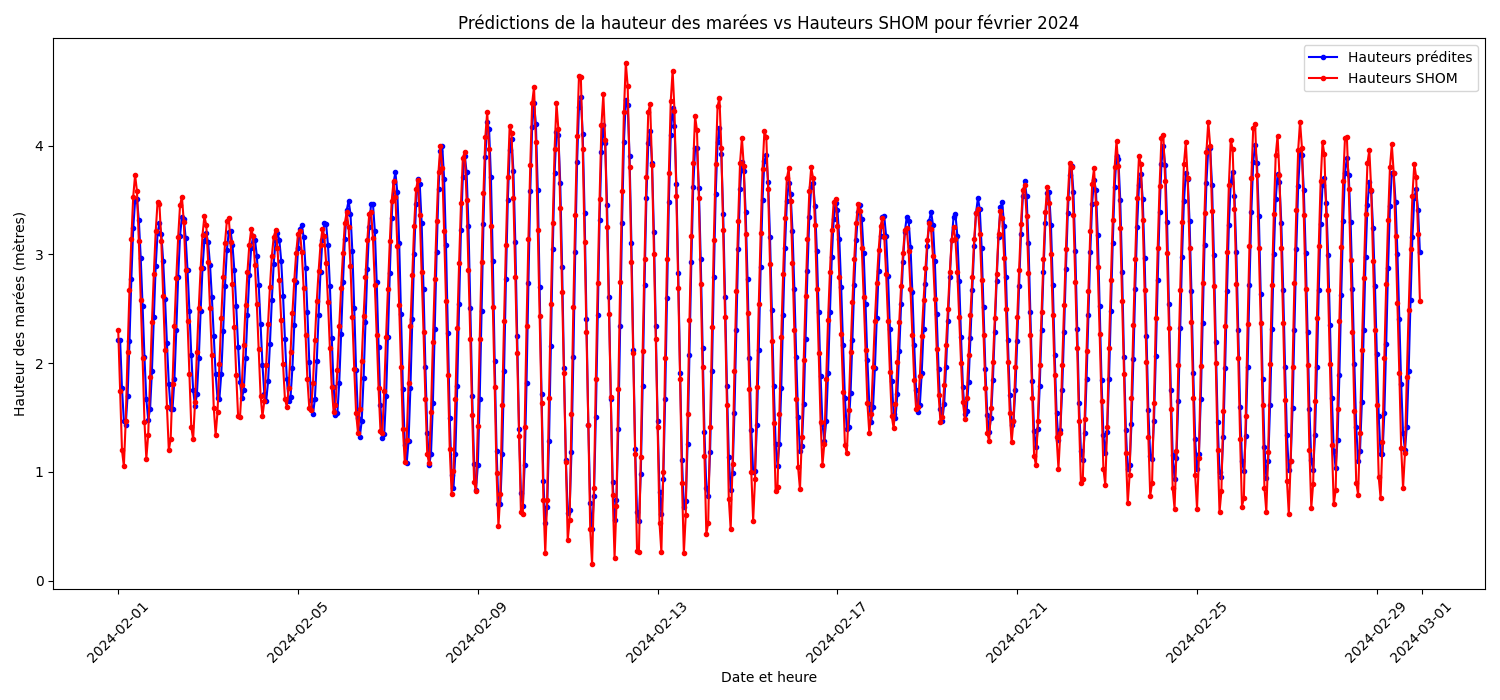

In [12]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035),
    ('P1', 0, 0, 14.958931),
    ('M4', 0, 0, 57.96821)
]

csv_file_path = 'donnees_marees_2020_2023_cleaned.csv'
tide_data = pd.read_csv(csv_file_path)

msl_2023 = tide_data['Verified (m)'].mean()
print(f"Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : {msl_2023} mètres")


epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return  msl_2023 + tide_height

def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

initial_params = np.concatenate([amplitudes, phases])

start_time = datetime.now()

res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights, speeds),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

end_time = datetime.now()

duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

noaa_data_path = 'ArcachonFevrier2024_cleaned.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_seconds_since_epoch = (noaa_data['Datetime'] - epoch).dt.total_seconds().values
noaa_verified_heights = noaa_data['Verified (m)'].values

start_datetime = noaa_data['Datetime'].min()
end_datetime = noaa_data['Datetime'].max()    
total_hours = int((end_datetime - start_datetime).total_seconds() / 3600) + 1
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(total_hours)])
times_since_epoch = (timestamps - epoch.timestamp())

predicted_heights = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

aligned_predicted_heights = np.interp(noaa_seconds_since_epoch, times_since_epoch, predicted_heights)
rmse = calculate_rmse(noaa_verified_heights, aligned_predicted_heights)
print(f"RMSE for the entire month: {rmse}")

plt.figure(figsize=(15, 7))
plt.plot(noaa_data['Datetime'], aligned_predicted_heights, label='Hauteurs prédites', marker='.', linestyle='-', color='blue')
plt.plot(noaa_data['Datetime'], noaa_data['Verified (m)'], label='Hauteurs SHOM', marker='.', linestyle='-', color='red')
plt.xlabel('Date et heure')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prédictions de la hauteur des marées vs Hauteurs SHOM pour février 2024')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 

plt.show()





### Optimisation pour Arcachon

RMSE: 0.7774734497070312


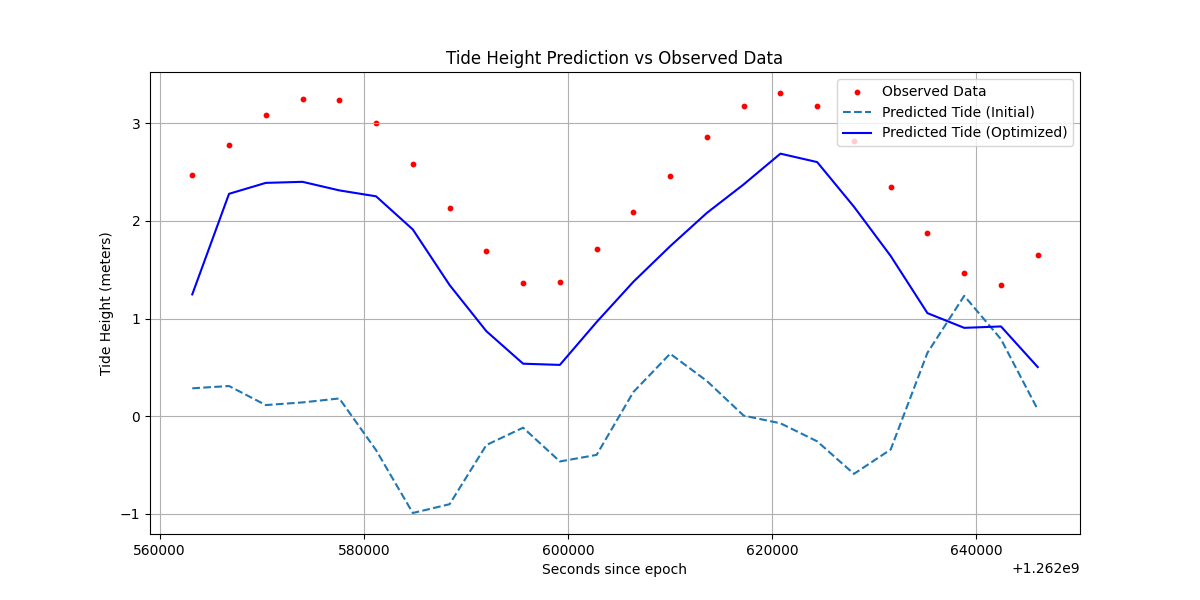

In [14]:
import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
from jax import grad, jit
import optax
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

constituents = [
    ('J1', 1 * 0.3048, 1 * np.pi / 180, 15.5854433 * np.pi / 180 / 3600),
    ('K1', 1 * 0.3048, 1 * np.pi / 180, 15.0410686 * np.pi / 180 / 3600),
    ('K2', 1 * 0.3048, 1 * np.pi / 180, 30.0821373 * np.pi / 180 / 3600),
    ('L2', 1 * 0.3048, 1 * np.pi / 180, 29.5284789 * np.pi / 180 / 3600),
    ('M1', 1 * 0.3048, 1 * np.pi / 180, 14.4966939 * np.pi / 180 / 3600),
    ('M2', 1 * 0.3048, 1 * np.pi / 180, 28.9841042 * np.pi / 180 / 3600),
    ('M3', 1 * 0.3048, 1 * np.pi / 180, 43.4761563 * np.pi / 180 / 3600),
    ('M4', 1 * 0.3048, 1 * np.pi / 180, 57.9682084 * np.pi / 180 / 3600),
    ('M6', 1 * 0.3048, 1 * np.pi / 180, 86.9523126 * np.pi / 180 / 3600),
    ('N2', 1 * 0.3048, 1 * np.pi / 180, 28.4397295 * np.pi / 180 / 3600),
    ('O1', 1 * 0.3048, 1 * np.pi / 180, 13.9430356 * np.pi / 180 / 3600),
    ('P1', 1 * 0.3048, 1 * np.pi / 180, 14.9589314 * np.pi / 180 / 3600),
]

csv_file_path = '04-01-2023 Arcachon.csv' 
tide_data = pd.read_csv(csv_file_path)

epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Temps'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

observed_heights = tide_data['Hauteur (m)'].values
times = tide_data['Seconds since epoch'].values

amplitudes = jnp.array([amp for _, amp, _, _ in constituents])
phases = jnp.array([phase for _, _, phase, _ in constituents])
speeds = jnp.array([speed for _, _, _, speed in constituents])

def predict_tide(times, amplitudes, phases, speeds):
    tide_height = jnp.sum(amplitudes * jnp.cos(speeds * times[:, None] + phases), axis=1)
    return tide_height

predict_tide_jit = jit(predict_tide)

def loss_fn(params, times, observed_heights):
    num_constituents = len(constituents)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return jnp.mean((predictions - observed_heights) ** 2)

times_jax = jax.device_put(times)
observed_heights_jax = jax.device_put(observed_heights)

initial_params = jnp.concatenate([amplitudes, phases])

optimizer = optax.adam(learning_rate=1e-2)
opt_state = optimizer.init(initial_params)

grad_fn = jit(grad(loss_fn))

@jit
def update(params, opt_state, times, observed_heights):
    grads = grad_fn(params, times, observed_heights)
    updates, opt_state = optimizer.update(grads, opt_state)
    return optax.apply_updates(params, updates), opt_state

for _ in range(1000):  
    initial_params, opt_state = update(initial_params, opt_state, times_jax, observed_heights_jax)

optimized_amplitudes = initial_params[:len(constituents)]
optimized_phases = initial_params[len(constituents):]

predicted_optimized = predict_tide_jit(times_jax, optimized_amplitudes, optimized_phases, speeds)

rmse = jnp.sqrt(jnp.mean((predicted_optimized - observed_heights_jax) ** 2))
print(f"RMSE: {rmse}")

predicted_optimized_np = np.array(predicted_optimized)
times_np = np.array(times)
observed_heights_np = np.array(observed_heights)

plt.figure(figsize=(12, 6))

plt.scatter(times_np, observed_heights_np, label='Observed Data', color='red', s=10)

predicted_initial = predict_tide_jit(times_jax, amplitudes, phases, speeds)
plt.plot(times_np, predicted_initial, label='Predicted Tide (Initial)', linestyle='--')

plt.plot(times_np, predicted_optimized_np, label='Predicted Tide (Optimized)', color='blue')

plt.xlabel('Seconds since epoch')
plt.ylabel('Tide Height (meters)')
plt.title('Tide Height Prediction vs Observed Data')
plt.legend()
plt.grid(True)
plt.show()


### Extraction des données depuis SHOM

In [125]:
# CORRECT 

from selenium import webdriver
from selenium.webdriver.common.by import By
import csv
from datetime import datetime, timedelta

# URL de base avec le format de date
base_url = "https://maree.shom.fr/harbor/LACANAU/wl/0?date={}&utc=standard"

# Utilise un navigateur Chrome (assurez-vous que chromedriver est installé et dans le PATH)
driver = webdriver.Chrome()

# Crée un fichier CSV pour stocker les données
with open('LACANAU-Fevrier2024.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Écriture de l'en-tête du fichier CSV
    csvwriter.writerow(["Date", "Time (GMT)", "Verified (m)"])

    # Itération sur les jours de l'année 2023
    start_date = datetime(2024, 2, 1)
    end_date = datetime(2024, 2, 29)
    current_date = start_date

    while current_date <= end_date:
        # Formatage de la date dans le format attendu par le site
        date_str = current_date.strftime("%Y/%m/%d")
        url = base_url.format(date_str)

        # Ouvre la page dans le navigateur
        driver.get(url)

        # Attends que la page soit complètement chargée 
        driver.implicitly_wait(10)

        # Trouve la table par son sélecteur CSS
        table = driver.find_element(By.CSS_SELECTOR, 'table')

        # Parcours les lignes de la table (en commençant par la deuxième ligne pour éviter les en-têtes répétées)
        rows = table.find_elements(By.TAG_NAME, 'tr')[1:]
        for i in range(0, len(rows), 2):
            # Extrait les cellules de chaque ligne
            cells_hours = rows[i].find_elements(By.XPATH, './/th | .//td')
            cells_heights = rows[i+1].find_elements(By.XPATH, './/td')
            # Écrit les données dans le fichier CSV, en retirant le dernier caractère 'm' des hauteurs
            for hour, height in zip(cells_hours, cells_heights):
                height_value = height.text.strip()[:-1]  # Supprime le dernier caractère 'm'
                csvwriter.writerow([date_str, hour.text.strip(), height_value])

        # Passe à la prochaine date
        current_date += timedelta(days=1)

# Ferme le navigateur
driver.quit()

print("Les données ont été extraites avec succès et enregistrées dans 'donnees_marees_2020_2023.csv'.")

Les données ont été extraites avec succès et enregistrées dans 'donnees_marees_2020_2023.csv'.


## Pour MARSEILLE

In [16]:
### Pour tout le mois

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035),
    ('P1', 0, 0, 14.958931),
    ('M4', 0, 0, 57.96821)
]

csv_file_path = 'Pdp/DataFR/MARSEILLE-2023-cleaned.csv'
tide_data = pd.read_csv(csv_file_path)

msl_2023 = tide_data['Verified (m)'].mean()
print(f"Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : {msl_2023} mètres")

epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return  msl_2023 + tide_height

def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

initial_params = np.concatenate([amplitudes, phases])

start_time = datetime.now()

res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights, speeds),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

end_time = datetime.now()

duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

noaa_data_path = 'Pdp/DataFR/MARSEILLE-Fevrier2024.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_seconds_since_epoch = (noaa_data['Datetime'] - epoch).dt.total_seconds().values
noaa_verified_heights = noaa_data['Verified (m)'].values

start_datetime = noaa_data['Datetime'].min()  
end_datetime = noaa_data['Datetime'].max()    
total_hours = int((end_datetime - start_datetime).total_seconds() / 3600) + 1
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(total_hours)])
times_since_epoch = (timestamps - epoch.timestamp())

predicted_heights = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

aligned_predicted_heights = np.interp(noaa_seconds_since_epoch, times_since_epoch, predicted_heights)
rmse = calculate_rmse(noaa_verified_heights, aligned_predicted_heights)
print(f"RMSE for the entire month: {rmse}")

plt.figure(figsize=(15, 7))
plt.plot(noaa_data['Datetime'], aligned_predicted_heights, label='Hauteurs prédites', marker='.', linestyle='-', color='blue')
plt.plot(noaa_data['Datetime'], noaa_data['Verified (m)'], label='Hauteurs SHOM', marker='.', linestyle='-', color='red')
plt.xlabel('Date et heure')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prédictions de la hauteur des marées vs Hauteurs SHOM pour février 2024')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 

plt.show()





Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : 0.4941641927380681 mètres
Optimization failed.
Optimization failed with message: ABNORMAL_TERMINATION_IN_LNSRCH


ValueError: Incompatible shapes for broadcasting: shapes=[(696, 7), (12,)]

## Pour SAINT MALO

In [17]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

constituents = [
    ('M2', 0, 0, 28.984104),
    ('S2', 0, 0, 30.0),
    ('N2', 0, 0, 28.43973),
    ('K1', 0, 0, 15.041069),
    ('O1', 0, 0, 13.943035),
    ('P1', 0, 0, 14.958931),
    ('M4', 0, 0, 57.96821)
]

csv_file_path = 'Pdp/DataFR/SAINT-MALO-2023-cleaned.csv'
tide_data = pd.read_csv(csv_file_path)

msl_2023 = tide_data['Verified (m)'].mean()
print(f"Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : {msl_2023} mètres")

epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

amplitudes = np.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases = np.array([phase for _, _, phase, _ in constituents]) * np.pi / 180
speeds = np.array([speed for _, _, _, speed in constituents]) * np.pi / 180 / 3600

def predict_tide(times, amplitudes, phases, speeds):
    tide_height = np.sum(amplitudes * np.cos(speeds * times[:, None] + phases), axis=1)
    return  msl_2023 + tide_height

def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide(times, amplitudes, phases, speeds)
    return np.mean((predictions - observed_heights) ** 2)

initial_params = np.concatenate([amplitudes, phases])

start_time = datetime.now()

res = minimize(
    fun=loss_fn,
    x0=initial_params,
    args=(times, observed_heights, speeds),
    method='L-BFGS-B',
    options={'maxfun': 50000, 'maxiter': 50000}
)

end_time = datetime.now()

duration = end_time - start_time

if res.success:
    optimized_params = res.x
    optimized_amplitudes = optimized_params[:len(speeds)]
    optimized_phases = optimized_params[len(speeds):]
    print("Optimization successful.")
    print(f"Optimization time: {duration}")
else:
    print("Optimization failed.")
    print(f"Optimization failed with message: {res.message}")

noaa_data_path = 'Pdp/DataFR/SAINT-MALO-Fevrier2024.csv'
noaa_data = pd.read_csv(noaa_data_path)
noaa_data['Datetime'] = pd.to_datetime(noaa_data['Date'] + ' ' + noaa_data['Time (GMT)'])
noaa_seconds_since_epoch = (noaa_data['Datetime'] - epoch).dt.total_seconds().values
noaa_verified_heights = noaa_data['Verified (m)'].values

start_datetime = noaa_data['Datetime'].min() 
end_datetime = noaa_data['Datetime'].max()   
total_hours = int((end_datetime - start_datetime).total_seconds() / 3600) + 1
timestamps = np.array([(start_datetime + timedelta(hours=i)).timestamp() for i in range(total_hours)])
times_since_epoch = (timestamps - epoch.timestamp())

predicted_heights = predict_tide(times_since_epoch, optimized_amplitudes, optimized_phases, speeds)

def calculate_rmse(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

aligned_predicted_heights = np.interp(noaa_seconds_since_epoch, times_since_epoch, predicted_heights)
rmse = calculate_rmse(noaa_verified_heights, aligned_predicted_heights)
print(f"RMSE for the entire month: {rmse}")

plt.figure(figsize=(15, 7))
plt.plot(noaa_data['Datetime'], aligned_predicted_heights, label='Hauteurs prédites', marker='.', linestyle='-', color='blue')
plt.plot(noaa_data['Datetime'], noaa_data['Verified (m)'], label='Hauteurs SHOM', marker='.', linestyle='-', color='red')
plt.xlabel('Date et heure')
plt.ylabel('Hauteur des marées (mètres)')
plt.title('Prédictions de la hauteur des marées vs Hauteurs SHOM pour février 2024')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 

plt.show()





Le Mean Sea Level (MSL) calculé pour l'année 2023 est de : 6.783257593057775 mètres
Optimization failed.
Optimization failed with message: ABNORMAL_TERMINATION_IN_LNSRCH


ValueError: Incompatible shapes for broadcasting: shapes=[(696, 7), (12,)]

## Avec JAX OPTAX

In [18]:
import jax
import jax.numpy as jnp
import optax
from jax import grad
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error

csv_file_path = 'Pdp/DataFR/MARSEILLE-2023-cleaned.csv'
tide_data = pd.read_csv(csv_file_path)

msl_2023 = tide_data['Verified (m)'].mean()

epoch = datetime(1983, 1, 1)
tide_data['Datetime'] = pd.to_datetime(tide_data['Date'] + ' ' + tide_data['Time (GMT)'])
tide_data['Seconds since epoch'] = (tide_data['Datetime'] - epoch).dt.total_seconds()

observed_heights = tide_data['Verified (m)'].values
times = tide_data['Seconds since epoch'].values

times_jax = jnp.array(times)
observed_heights_jax = jnp.array(observed_heights)

speeds_jax = jnp.array([speed for _, _, _, speed in constituents]) * jnp.pi / 180 / 3600
amplitudes_jax = jnp.array([amp for _, amp, _, _ in constituents]) * 0.3048
phases_jax = jnp.array([phase for _, _, phase, _ in constituents]) * jnp.pi / 180

initial_params_jax = jnp.concatenate([amplitudes_jax, phases_jax])

def predict_tide_jax(times, amplitudes, phases, speeds):
    tide_height = jnp.sum(amplitudes * jnp.cos(speeds * times[:, None] + phases), axis=1)
    return msl_2023 + tide_height

def loss_fn(params, times, observed_heights, speeds):
    num_constituents = len(speeds)
    amplitudes = params[:num_constituents]
    phases = params[num_constituents:]
    predictions = predict_tide_jax(times, amplitudes, phases, speeds)
    return jnp.mean((predictions - observed_heights) ** 2)

grad_loss = jax.grad(loss_fn)

optimizer = optax.adam(1e-2)
opt_state = optimizer.init(initial_params_jax)

for epoch in range(1000):
    grads = grad_loss(initial_params_jax, times_jax, observed_heights_jax, speeds_jax)
    updates, opt_state = optimizer.update(grads, opt_state)
    initial_params_jax = optax.apply_updates(initial_params_jax, updates)

predicted_heights_jax = predict_tide_jax(times_jax, initial_params_jax[:len(speeds_jax)], initial_params_jax[len(speeds_jax):], speeds_jax)

rmse = jnp.sqrt(jnp.mean((predicted_heights_jax - observed_heights_jax) ** 2))
print(f'RMSE: {rmse}')



RMSE: nan
